In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Create a DataFrame from the list of dictionaries below:

In [2]:
store_data = [
    {'product_id' : 23, 'name' : 'computer', 'wholesale_price' : 500, 'retail_price' : 1000, 'sales' : 100},
    {'product_id' : 96, 'name' : 'Phython Workout', 'wholesale_price' : 35, 'retail_price' : 75, 'sales' : 1000},
    {'product_id' : 97, 'name' : 'Pandas Workout', 'wholesale_price' : 35, 'retail_price' : 75, 'sales' : 500},
    {'product_id' : 15, 'name' : 'banana', 'wholesale_price' : 0.5, 'retail_price' : 1, 'sales' : 200},
    {'product_id' : 87, 'name' : 'sandwich', 'wholesale_price' : 3, 'retail_price' : 5, 'sales' : 300}
]

In [3]:
# create dataframe from list of dictionaries
# set_index as values of the name column instead of the default indexes (0 to -1)
store_df = pd.DataFrame(store_data)
store_df.set_index('name', inplace = True)
store_df

,product_id,wholesale_price,retail_price,sales
name,,,,
computer,23,500.0,1000,100
Phython Workout,96,35.0,75,1000
Pandas Workout,97,35.0,75,500
banana,15,0.5,1,200
sandwich,87,3.0,5,300


#### Step 2: Calculate the Total Profit for each product:

In [4]:
# calculate net revenue per product = (retail_price - wholesale_price) * sales
# add new column with net revenue of each product to dataframe
net_revenue_per_product = (store_df['retail_price'] - store_df['wholesale_price']) * store_df['sales']

# when the store sales at retail instead of wholesale price,
# they make a profit of ((retail_price - whole_sale price) * sales) for each product
# which is equal to net revenue of each product
# add new column with total profit of each product to dataframe
total_profit_per_product = net_revenue_per_product
store_df['net_revenue'] = net_revenue_per_product
store_df['total_profit'] = total_profit_per_product
print('The total profit for each product is:')
store_df['total_profit']

The total profit for each product is:


name
computer           50000.0
Phython Workout    40000.0
Pandas Workout     20000.0
banana               100.0
sandwich             600.0
Name: total_profit, dtype: float64

#### Step 3: Determine the following:
##### a). How much total net revenue you received from all of these sales?

In [5]:
# sum net revenue of all products to get total net revenue of all sales 
total_net_revenue = store_df['net_revenue'].sum()
print(f"The total net revenue received from all the sales is: {'GH₵ {:,.2f}'.format(total_net_revenue)}")

The total net revenue received from all the sales is: GH₵ 110,700.00


##### b). For what products is the retail_price more than twice the wholesale_price?

In [6]:
# create a filter to grab the rows of data with products whose retail_price is more than twice the wholesale_price
# return dataframe with product name, wholesale and retail prices to visualize the filtered data
filt = (store_df['retail_price'] > store_df['wholesale_price'] * 2)
print('The products whose retail price is more than twice the wholesale price is:')
store_df.loc[filt, ['wholesale_price', 'retail_price']]

The products whose retail price is more than twice the wholesale price is:


,wholesale_price,retail_price
name,,
Phython Workout,35.0,75
Pandas Workout,35.0,75


##### c). How much did the store make from foods vs. computers vs. books?

In [7]:
# grab rows of each group of products i.e., food products, computer products and books
# calculate the total net revenue of each group of products
foods = store_df.iloc[[3,4]]
computers = store_df.iloc[0]
books = store_df.iloc[[1,2]]

# total net revenue obtained from sales of foods, computers and books
net_foods_revenue = foods['net_revenue'].sum()
net_computers_revenue = computers['net_revenue'].sum()
net_books_revenue = books['net_revenue'].sum()

print(f"The total net revenue from sales of food products is: GH₵ {net_foods_revenue:,.2f}")
print(f"The total net revenue from sales of computer products is: GH₵ {net_computers_revenue:,.2f}")
print(f"The total net revenue from sales of books is: GH₵ {net_books_revenue:,.2f}")

The total net revenue from sales of food products is: GH₵ 700.00
The total net revenue from sales of computer products is: GH₵ 50,000.00
The total net revenue from sales of books is: GH₵ 60,000.00


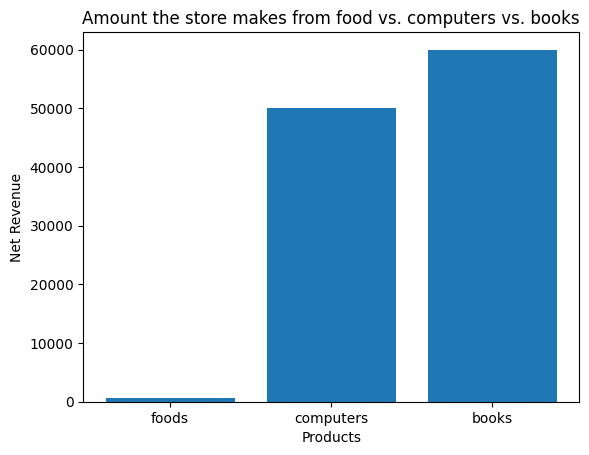

In [8]:
# use matplotlib library to visualize the comparison of how much the store made from sales of each group of products
# use bar graph visualization
# x values should be the product groups
# y values should be the total revenue of each group of products in the order respective to product groups
x = ['foods', 'computers', 'books']
y = [net_foods_revenue, net_computers_revenue, net_books_revenue]
plt.bar(x,y)

# add labels and title to clearly represent the visualized data
plt.xlabel('Products')
plt.ylabel('Net Revenue')
plt.title('Amount the store makes from food vs. computers vs. books')
plt.show()

##### Because your store is doing so well, you're able to negotiate a 30% discount on the wholesale price of goods. Calculate the new net revenue.

In [9]:
# calculate new wholesale price after 30% discount
# calculate new net revenue and add it to the dataframe
new_wholesale_price = ((100-30)/100) * store_df['wholesale_price']
new_net_revenue_per_product = (store_df['retail_price'] - new_wholesale_price) * store_df['sales']

store_df['new_net_revenue'] = new_net_revenue_per_product
print('The new net revenue of each product after a 30% discount on their wholesale price is:')
store_df.loc[:, 'new_net_revenue']

The new net revenue of each product after a 30% discount on their wholesale price is:


name
computer           65000.0
Phython Workout    50500.0
Pandas Workout     25250.0
banana               130.0
sandwich             870.0
Name: new_net_revenue, dtype: float64